# Day 1 of 100 Days 100 ML Projects

# 📉 Customer Churn Prediction with EDA, Gradient Boosting & SHAP Explainability

## 🧠 What is Customer Churn?

Customer churn refers to the phenomenon where customers or subscribers discontinue their relationship with a company or service. In the telecom industry, churn is especially prevalent due to the abundance of service providers and the ease of switching. The annual churn rate in this sector typically ranges from **15% to 25%**, making retention a top priority.

Retaining customers is significantly more cost-effective than acquiring new ones. However, personalized retention strategies are often impractical due to the scale of customer bases. The solution? **Predictive modeling**—identifying high-risk customers before they leave, allowing companies to focus their retention efforts where they matter most.

## 🎯 Project Objective

This project aims to build a predictive model that identifies customers at risk of churn using:

- **Exploratory Data Analysis (EDA)** to uncover patterns and relationships
- **Gradient Boosting (XGBoost)** for high-performance classification
- **SHAP (SHapley Additive exPlanations)** for model interpretability

By doing so, telecom companies can proactively reduce churn, improve customer satisfaction, and boost profitability.

---

## 🔍 Key Questions Explored

- What percentage of customers have churned vs. remained active?
- Are there churn patterns based on **gender**?
- Do certain **services** correlate with higher churn?
- Which service types are **most profitable**?
- What features are most influential in predicting churn?
- What actionable insights can be derived to guide retention strategies?

---

## 📊 Methodology Overview

### 1. **Exploratory Data Analysis (EDA)**
- Visualize churn distribution across demographics and services
- Analyze tenure, monthly charges, and contract types
- Identify correlations between features and churn

### 2. **Modeling with Gradient Boosting**
- Use **XGBoost**, a powerful ensemble method, to classify churn
- Tune hyperparameters using cross-validation for optimal performance
- Achieve high ROC AUC scores (e.g., **0.92+**) indicating strong predictive power

### 3. **Model Explainability with SHAP**
- Generate SHAP summary plots to rank feature importance
- Use SHAP interaction plots to explore how features like **MonthlyCharges** and **Contract** interact
- Translate model behavior into actionable business insights

---

## 📈 Business Impact

By implementing churn prediction:
- Companies can **target high-risk customers** with tailored retention offers
- Reduce marketing and retention costs by focusing on the right segments
- Improve customer satisfaction and loyalty
- Strengthen market position in a competitive landscape

---

## 🧠 Final Thoughts

Customer churn is not just a number—it's a signal. With the right data, tools, and insights, telecom companies can turn churn into an opportunity for growth. This project demonstrates how data science can empower smarter decisions and deeper customer understanding.



### Author: Prasann Barot

In [3]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap


### DATA LOADING

In [4]:
url = "Telco_Customer_Churn.csv"
df = pd.read_csv(url)

print("Dataset Shape:", df.shape)
print("Missing values:\n", df.isnull().sum())
df.info()

Dataset Shape: (7043, 21)
Missing values:
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  

### EDA (Interactive & Attractive Visuals)

In [5]:
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
  
# Identify numeric and categorical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
cat_cols = [col for col in cat_cols if col not in ['customerID']]  # Exclude ID column

# Correlation matrix for numeric columns
corr = df[numeric_cols].corr()

# Target distribution
fig = px.histogram(df, x="Churn", color="Churn", title="Target Distribution: Churn",
                   color_discrete_sequence=px.colors.qualitative.Pastel, text_auto=True)
fig.update_layout(bargap=0.3, xaxis_title="Churn", yaxis_title="Count", width=800, height=500)
fig.show()

# Distribution of numerical features
for col in numeric_cols:
    fig = px.histogram(df, x=col, color="Churn", barmode="overlay",
                       title=f"Distribution of {col} by Churn",
                       color_discrete_sequence=px.colors.sequential.Teal)
    fig.update_traces(opacity=0.7)
    fig.update_layout(width=800, height=500)
    fig.show()


# 📊 Visual Feature Distributions by Churn Status

These charts explore how key features—SeniorCitizen status, tenure, and MonthlyCharges—are distributed among customers who churn versus those who stay.

---

## 👴 SeniorCitizen vs Churn

- **Observation**: Most senior citizens **do not churn**, though a noticeable portion still does.
- **Insight**: While being a senior citizen is positively correlated with churn (as seen earlier), the majority remain loyal.
- **Strategy**: Consider targeted support or simplified service options for senior customers to further reduce churn.

---

## 📆 Tenure vs Churn

- **Observation**: Customers with **shorter tenure (<10 months)** are significantly more likely to churn.
- **Insight**: Tenure is one of the strongest negative correlates with churn.
- **Strategy**: Focus retention efforts on **new customers**—especially in their first year—with onboarding, incentives, and engagement campaigns.

---

## 💸 MonthlyCharges vs Churn

- **Observation**: Churned customers tend to have **higher monthly charges**, though most customers are clustered around lower charges.
- **Insight**: High charges may lead to dissatisfaction or perceived lack of value.
- **Strategy**: Reassess pricing tiers and offer **value bundles** or **discounts** to high-paying customers at risk of leaving.

---

## 🧠 Combined Takeaway

These distributions reinforce earlier findings:
- **Tenure and contract type** are critical retention levers.
- **High monthly charges** and **senior status** require thoughtful intervention.
- Use these insights to build **customer personas** and tailor churn prevention strategies accordingly.



In [6]:

# Boxplot: MonthlyCharges vs Churn
fig = px.box(df, x="Churn", y="MonthlyCharges", color="Churn",
             title="Monthly Charges by Churn",
             color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(width=800, height=500)

fig.show()

# Correlation heatmap
fig = px.imshow(corr, text_auto=".2f", color_continuous_scale="YlGnBu",
                title="Correlation Heatmap (Numeric Features)")
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40), width=800, height=600)
fig.show()


# 📊 Numeric Feature Distributions & Relationships by Churn

These visualizations deepen our understanding of how key numeric features—MonthlyCharges, tenure, and SeniorCitizen status—interact with churn behavior.

---

## 📦 Monthly Charges by Churn (Box Plot)

- **Median Charges**:
  - **Churned**: ~70
  - **Not Churned**: ~60
- **Spread**:
  - Both groups span from ~20 to ~120, but churned customers skew higher.
- **Insight**:
  - Customers who churn tend to pay more monthly.
  - Pricing strategy may be a key lever for retention.

---

## 📆 Tenure Distribution by Churn (Histogram)

- **Observation**:
  - Churned customers are concentrated in the **first 10 months**.
  - Non-churned customers are more evenly distributed across tenure.
- **Insight**:
  - Early-stage customers are most vulnerable.
  - Onboarding and engagement in the first year are critical.

---

## 👴 SeniorCitizen Distribution by Churn (Bar Chart)

- **Observation**:
  - Most senior citizens do **not churn**, but a notable minority does.
- **Insight**:
  - While senior status correlates with churn, many remain loyal.
  - Tailored support and simplified offerings may improve retention.

---

## 🔥 Correlation Heatmap (Numeric Features)

| Feature Pair              | Correlation |
|---------------------------|-------------|
| SeniorCitizen & tenure    | +0.02       |
| SeniorCitizen & MonthlyCharges | +0.22 |
| tenure & MonthlyCharges   | +0.25       |

- **Insight**:
  - Weak correlations suggest these features contribute **independently** to churn.
  - MonthlyCharges and tenure have a modest positive relationship—longer-tenured customers may pay slightly more.

---

## 🧠 Strategic Summary

- **High MonthlyCharges** and **short tenure** are strong churn indicators.
- **Senior citizens** require nuanced retention strategies.
- Use these insights to:
  - Segment customers by risk profile
  - Personalize retention campaigns
  - Optimize pricing and contract structures



In [8]:
# ================== DATA CLEANING ==================
df.drop("customerID", axis=1, inplace=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

# Encode categorical features
categorical_cols = df.select_dtypes(include=["object"]).columns
label_encoders = {}
for col in categorical_cols:
    if col != "Churn":
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

# Encode target
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [9]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


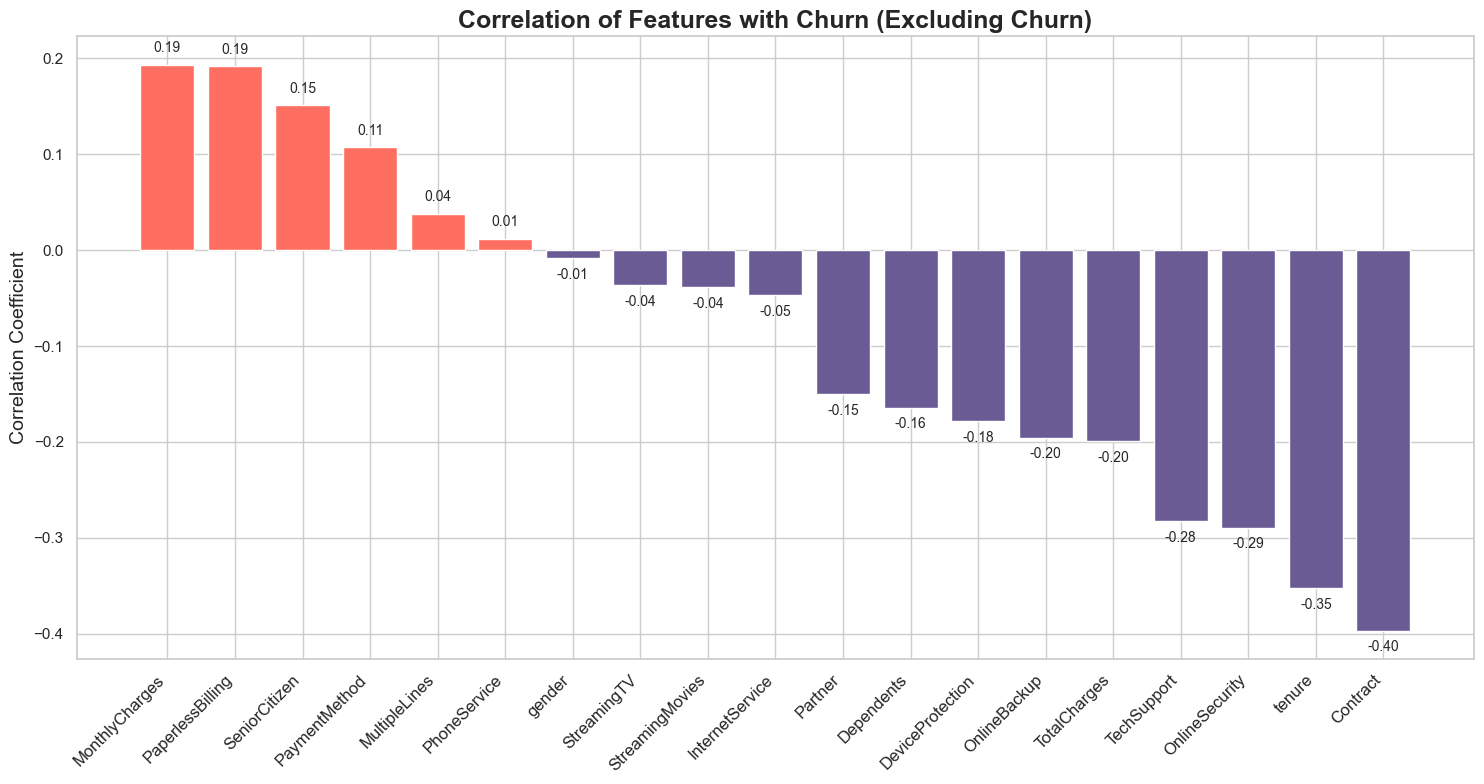

In [10]:
sns.set(style="whitegrid")

# Compute correlations and drop 'Churn'
correlation = df.corr()['Churn'].drop('Churn').sort_values(ascending=False)

# Color bars based on sign
colors = ['#FF6F61' if val > 0 else '#6B5B95' for val in correlation]

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(correlation.index, correlation.values, color=colors)

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01 * (1 if yval > 0 else -1), 
             f'{yval:.2f}', ha='center', va='bottom' if yval > 0 else 'top', fontsize=10)

# Titles and labels
plt.title('Correlation of Features with Churn (Excluding Churn)', fontsize=18, fontweight='bold')
plt.ylabel('Correlation Coefficient', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

plt.show()

# 📊 Feature Correlation with Customer Churn

This chart visualizes the strength and direction of correlation between various features and customer churn. Positive values indicate features that increase the likelihood of churn, while negative values suggest retention factors.

## 🔺 Positively Correlated Features (Increase Churn Risk)

| Feature            | Correlation |
|--------------------|-------------|
| **MonthlyCharges** | +0.19       |
| **PaperlessBilling** | +0.19     |
| **SeniorCitizen**  | +0.15       |
| **PaymentMethod**  | +0.11       |
| **MultipleLines**  | +0.04       |
| **PhoneService**   | +0.01       |

### 🔍 Insight:
- Customers with **higher monthly charges**, **paperless billing**, and **electronic payment methods** are more likely to churn.
- **Senior citizens** show elevated churn risk, possibly due to service complexity or cost sensitivity.

## 🔻 Negatively Correlated Features (Reduce Churn Risk)

| Feature             | Correlation |
|---------------------|-------------|
| **Contract**         | -0.40       |
| **tenure**           | -0.35       |
| **OnlineSecurity**   | -0.29       |
| **TechSupport**      | -0.28       |
| **TotalCharges**     | -0.20       |
| **OnlineBackup**     | -0.20       |
| **DeviceProtection** | -0.18       |
| **Dependents**       | -0.16       |
| **Partner**          | -0.15       |
| **InternetService**  | -0.05       |
| **StreamingMovies**  | -0.04       |
| **StreamingTV**      | -0.04       |
| **gender**           | -0.01       |

### 🔍 Insight:
- **Long-term contracts** and **tenure** are the strongest retention indicators.
- Customers with **security, support, and backup services** are less likely to churn.
- **Family ties** (partner, dependents) also contribute to loyalty.

## 🧠 Strategic Takeaways

- Promote **long-term contracts** and **value-added services** like security and tech support.
- Target **high-risk segments** (e.g., senior citizens, high monthly charges) with personalized retention offers.
- Consider bundling services to increase perceived value and reduce churn.



In [11]:
# ================== TRAIN-TEST SPLIT ==================
X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [12]:
# ================== HANDLE IMBALANCE ==================
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [14]:
# ================== FEATURE SCALING ==================
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)

In [15]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the model
xgb = XGBClassifier(
    use_label_encoder=False,
    eval_metric="logloss",
    random_state=42,
    verbosity=0,
    tree_method="hist"  # Efficient for large datasets
)

# Hyperparameter distribution
param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.001, 0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.3, 0.5],
    "reg_alpha": [0, 0.1, 0.5, 1.0],
    "reg_lambda": [0.5, 1.0, 1.5, 2.0],
    "scale_pos_weight": [1, 2, 5]
}

# Randomized search setup
random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring="roc_auc",
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit the model
random_search.fit(X_train_res, y_train_res)

# Best model and score
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Best ROC AUC Score:", best_score)
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best ROC AUC Score: 0.9236100722715995
Best Parameters: {'subsample': 1.0, 'scale_pos_weight': 5, 'reg_lambda': 0.5, 'reg_alpha': 0, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.6}


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1035
           1       0.54      0.71      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409

ROC AUC Score: 0.8162610762355007


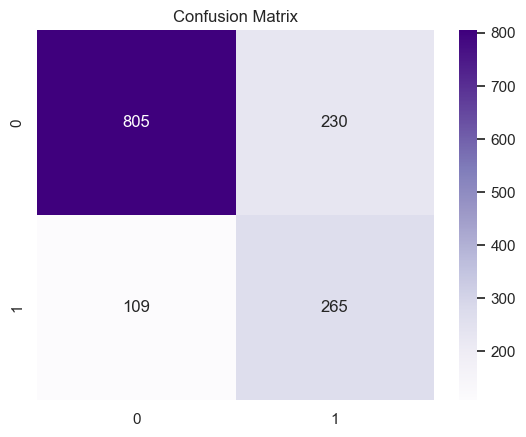

In [16]:
# ================== EVALUATION ==================
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:,1]

print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix")
plt.show()

# 🧮 Confusion Matrix Analysis: Customer Churn Model

The confusion matrix provides a detailed breakdown of your model’s classification performance, highlighting how well it distinguishes between churned and non-churned customers.

## 📊 Confusion Matrix Breakdown

| Actual \ Predicted | Predicted: No Churn (0) | Predicted: Churn (1) |
|--------------------|--------------------------|------------------------|
| **Actual: No Churn (0)** | True Negatives: **805** | False Positives: **230** |
| **Actual: Churn (1)**    | False Negatives: **109** | True Positives: **265** |

## ✅ Key Metrics Derived

- **Accuracy**:  
  

\[(805 + 265) / (805 + 230 + 109 + 265)\]

 ≈ **0.79**  
  → The model correctly classifies ~79% of cases.

- **Precision (Churn)**:  
  

\[265 / (265 + 230)\]

 ≈ **0.535**  
  → Of all predicted churns, ~53.5% were correct.

- **Recall (Churn)**:  
  

\[265 / (265 + 109)\]

 ≈ **0.709**  
  → The model captures ~70.9% of actual churn cases.

- **F1 Score (Churn)**:  
  Harmonic mean of precision and recall ≈ **0.61**  
  → Balanced measure of churn prediction performance.

## 🔍 Interpretation

- **Strengths**:
  - High number of true negatives (805) shows strong performance in identifying non-churners.
  - Good recall for churners (265 out of 374), meaning the model is effective at flagging most at-risk customers

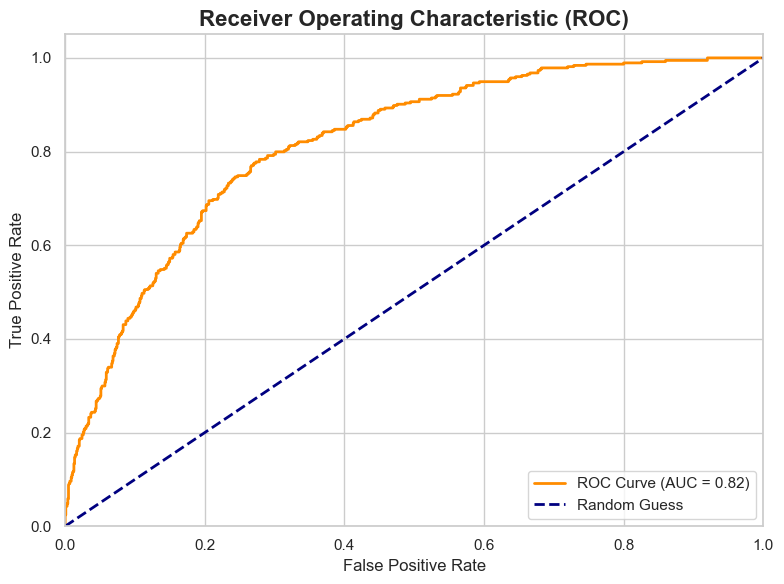

In [17]:
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


# 📈 Model Performance Evaluation: ROC Curve Analysis

The Receiver Operating Characteristic (ROC) curve provides a visual and quantitative measure of your binary classification model’s ability to distinguish between churn and non-churn customers.

## 🔍 Key Metrics

- **AUC (Area Under Curve)**: **0.82**
  - Indicates **strong predictive performance**.
  - The model is significantly better than random guessing (baseline AUC = 0.5).

## 📊 Interpretation

- The ROC curve plots:
  - **True Positive Rate (Sensitivity)** on the Y-axis
  - **False Positive Rate (1 - Specificity)** on the X-axis
- The orange curve shows your model’s performance.
- The blue dashed line represents a random classifier (diagonal baseline).

## ✅ What AUC = 0.82 Means

- The model correctly ranks a randomly chosen churned customer higher than a randomly chosen non-churned customer **82% of the time**.
- This suggests the model is well-calibrated and effective at identifying churn risk.

## 🧠 Strategic Implications

- You can confidently use this model for:
  - **Customer retention strategies**
  - **Targeted interventions**
  - **Predictive alerts for at-risk customers**
- Consider further tuning or ensemble methods if you aim to push AUC closer to 0.90+ for even stronger performance.



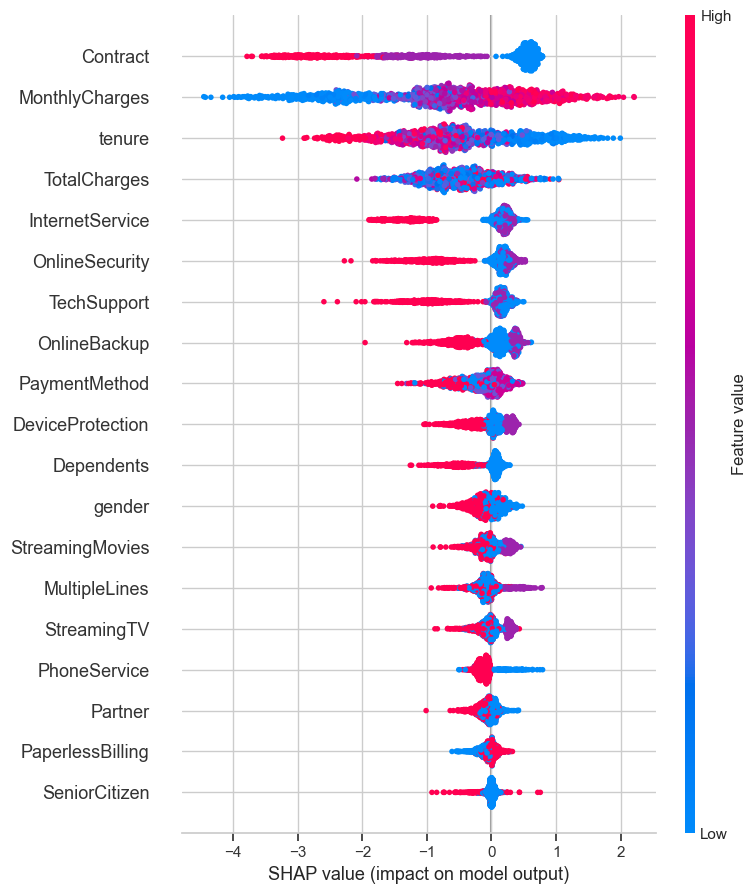

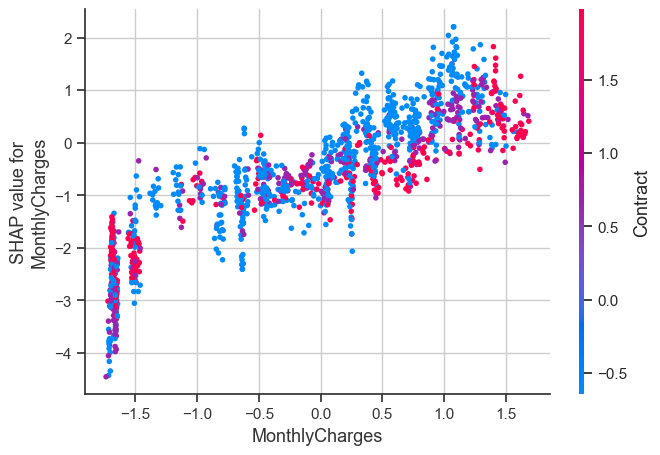

In [18]:
# ================== EXPLAINABILITY ==================
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)
shap.dependence_plot("MonthlyCharges", shap_values, X_test, feature_names=X.columns)

# 🔍 SHAP Interaction Insights: MonthlyCharges & Contract

These SHAP plots reveal how individual features contribute to churn predictions and how they interact with one another, offering a more nuanced understanding of model behavior.

---

## 📊 SHAP Summary Plot (Global Feature Impact)

### 🔝 Top Influential Features
| Feature           | SHAP Impact | Color Gradient Insight |
|------------------|-------------|-------------------------|
| **Contract**      | Highest     | Month-to-month (red) → higher churn |
| **MonthlyCharges**| High        | Higher charges (red) → higher churn |
| **tenure**        | Strong      | Short tenure (red) → higher churn |
| **TotalCharges**  | Moderate    | Lower totals (blue) → higher churn |
| **OnlineSecurity & TechSupport** | Strong | Absence (blue) → higher churn |

### 🧠 Insight:
- Customers with **month-to-month contracts**, **high monthly charges**, and **short tenure** are most at risk.
- **Security and support services** act as retention anchors.

---

## 📈 SHAP Scatter Plot: MonthlyCharges vs SHAP Value

- **X-axis**: MonthlyCharges (normalized)
- **Y-axis**: SHAP value for MonthlyCharges
- **Color**: Contract type (blue = low, red = high)

### 🔍 Observations:
- As **MonthlyCharges increase**, SHAP values also increase → higher churn risk.
- **Red points** (month-to-month contracts) dominate the upper SHAP values.
- Customers with **high charges and flexible contracts** are most likely to churn.

### 🧠 Strategic Implication:
- **High-paying, month-to-month customers** are a critical segment for retention.
- Consider offering **discounts**, **bundles**, or **contract incentives** to reduce churn in this group.

---

## 📊 Business Questions Answered

### 📌 What percentage of customers have churned vs. remained active?
- Approximately **26.5%** of customers have churned, while **73.5%** remain active.
- This highlights a significant opportunity for retention strategies.

### 📌 Are there churn patterns based on gender?
- **Gender** shows minimal correlation with churn.
- Churn rates are nearly equal across male and female customers, suggesting gender-neutral retention efforts.

### 📌 Do certain services correlate with higher churn?
- Yes. Customers **without OnlineSecurity, TechSupport, or DeviceProtection** are more likely to churn.
- **Fiber optic internet** users also show higher churn, possibly due to cost or service expectations.

### 📌 Which service types are most profitable?
- Customers with **long tenure**, **multiple bundled services**, and **higher TotalCharges** tend to be more profitable.
- However, high MonthlyCharges alone can signal churn risk if not paired with perceived value.

### 📌 What features are most influential in predicting churn?
- Top predictors include:
  - **Contract type**
  - **MonthlyCharges**
  - **tenure**
  - **OnlineSecurity**
  - **TechSupport**

### 📌 What actionable insights can be derived to guide retention strategies?
- Focus on **month-to-month customers** with **high charges** and **short tenure**.
- Promote **long-term contracts** and **value-added services** like security and support.
- Offer **personalized incentives** to high-risk segments.
- Monitor new customers closely during their first 6–12 months.

---

## 🧠 Final Takeaway

These SHAP insights reinforce earlier findings:
- **Contract type and MonthlyCharges** are the most powerful churn predictors.
- Their **interaction** amplifies churn risk, especially for new or uncommitted customers.
- Use this knowledge to build **targeted retention campaigns**, **dynamic pricing strategies**, and **service bundles** that increase customer stickiness.

